In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
#Load the dataset
file_path ="/content/processed dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,11,0.109175,0.018966,0.354981,4
1,10178643,13,0.167720,0.041494,0.407956,1
2,10513916,19,0.275227,0.072681,0.641183,4
3,10334589,19,0.273082,0.091841,0.637052,4
4,10458365,11,0.283937,0.116281,0.647737,4


In [4]:
#Checking missing values
print(df.info())
print(df.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774061 entries, 0 to 774060
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774061 non-null  int64  
 1   outlet_city       774061 non-null  int64  
 2   luxury_sales      774051 non-null  float64
 3   fresh_sales       774052 non-null  float64
 4   dry_sales         774053 non-null  float64
 5   cluster_catgeory  774061 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 35.4 MB
None
<bound method DataFrame.sum of         Customer_ID  outlet_city  luxury_sales  fresh_sales  dry_sales  \
0             False        False         False        False      False   
1             False        False         False        False      False   
2             False        False         False        False      False   
3             False        False         False        False      False   
4             False        False         False   

In [5]:
#Define Features and Target
print(df.columns)

x = df.drop(columns=['Customer_ID','cluster_catgeory'])

y = df['cluster_catgeory']

print("Features shape:", x.shape)
print("Target shape:", y.shape)

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'],
      dtype='object')
Features shape: (774061, 4)
Target shape: (774061,)


In [6]:
# Encoding for outlet city
le = LabelEncoder()
x['outlet_city'] = le.fit_transform(x['outlet_city'])

In [7]:
#splitting data into 80% trainING and 20% testing
# Drop rows with NaN values in the target variable 'cluster_catgeory'
df = df.dropna(subset=['cluster_catgeory'])

# Redefine x and y after dropping NaN values
x = df.drop(columns=['Customer_ID','cluster_catgeory'])
y = df['cluster_catgeory']

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Added this line

# Create a list of numerical features
numerical_features = x_train.select_dtypes(include=['number']).columns.tolist()

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['outlet_city']),
    ])

In [9]:
# Fit and transform the training data
x_train_scaled = preprocessor.fit_transform(x_train)

# Transform the testing data
x_test_scaled = preprocessor.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=preprocessor.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns=preprocessor.get_feature_names_out())

In [10]:
# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the training data
x_train_scaled = imputer.fit_transform(x_train_scaled)

# Transform the testing data
x_test_scaled = imputer.transform(x_test_scaled)

# Convert the imputed data back to DataFrames
x_train_scaled = pd.DataFrame(x_train_scaled, columns=preprocessor.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns=preprocessor.get_feature_names_out())

In [11]:
# initialize the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=5)

#Train model
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
#predict on test set
y_predict= knn.predict(x_test_scaled)

In [13]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))

Accuracy: 0.9998255960416761
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     38000
           2       1.00      1.00      1.00     31071
           3       1.00      1.00      1.00      9731
           4       1.00      1.00      1.00     34403
           5       1.00      1.00      1.00      7812
           6       1.00      1.00      1.00     33796

    accuracy                           1.00    154813
   macro avg       1.00      1.00      1.00    154813
weighted avg       1.00      1.00      1.00    154813

Confusion Matrix:
 [[37993     2     1     3     1     0]
 [    0 31069     1     1     0     0]
 [    1     1  9728     0     1     0]
 [    0     0     1 34398     3     1]
 [    1     1     2     1  7806     1]
 [    1     0     2     0     1 33792]]


In [14]:
#range of k values
k_values = range(1,21)
accuracy_scores = []

#Iterate over k values
for k in k_values:
  print(f"Trainning KNN with k={k}...")
  knn = KNeighborsClassifier(n_neighbors = k) # initialize KNN Model
  knn.fit(x_train_scaled, y_train)  # Train model
  y_predict = knn.predict(x_test_scaled) #Predict on test data
  accuracy = accuracy_score(y_test, y_predict)  # compute accuracy
  accuracy_scores.append(accuracy)
  print(f"Completed k={k}, Accuracy={accuracy:.4f}")

Trainning KNN with k=1...
Completed k=1, Accuracy=0.9996
Trainning KNN with k=2...
Completed k=2, Accuracy=0.9996
Trainning KNN with k=3...
Completed k=3, Accuracy=0.9998
Trainning KNN with k=4...
Completed k=4, Accuracy=0.9998
Trainning KNN with k=5...
Completed k=5, Accuracy=0.9998
Trainning KNN with k=6...
Completed k=6, Accuracy=0.9998
Trainning KNN with k=7...
Completed k=7, Accuracy=0.9998
Trainning KNN with k=8...
Completed k=8, Accuracy=0.9998
Trainning KNN with k=9...
Completed k=9, Accuracy=0.9998
Trainning KNN with k=10...
Completed k=10, Accuracy=0.9998
Trainning KNN with k=11...
Completed k=11, Accuracy=0.9998
Trainning KNN with k=12...
Completed k=12, Accuracy=0.9998
Trainning KNN with k=13...
Completed k=13, Accuracy=0.9998
Trainning KNN with k=14...
Completed k=14, Accuracy=0.9998
Trainning KNN with k=15...
Completed k=15, Accuracy=0.9998
Trainning KNN with k=16...
Completed k=16, Accuracy=0.9998
Trainning KNN with k=17...
Completed k=17, Accuracy=0.9998
Trainning KNN w

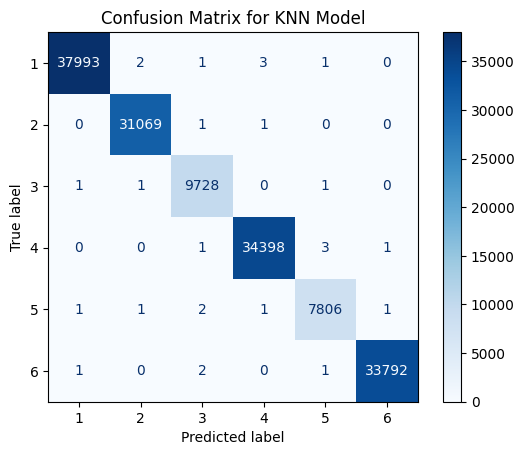

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) # Changed y_pred to y_predict

# Assuming y has the correct labels for your data
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)) # Changed digits.target_names to np.unique(y)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Model")
plt.show()

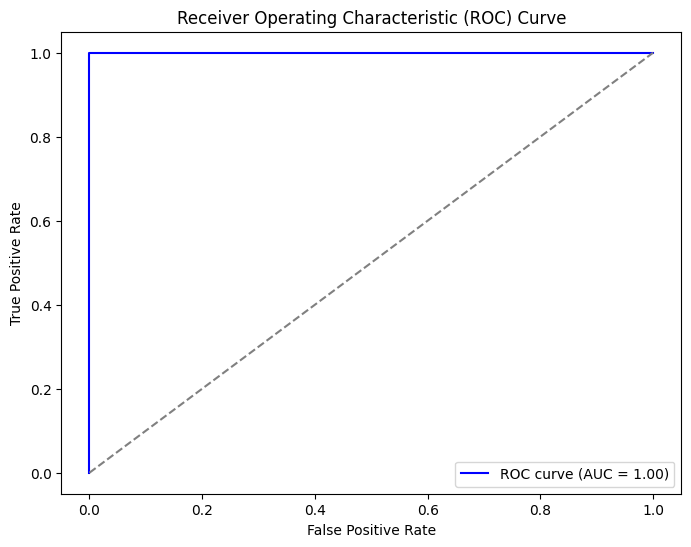

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score,auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=logreg.classes_)
n_classes = y_test_bin.shape[1]

yproba=logreg.predict_proba(x_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], yproba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), yproba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='blue', label=f'ROC curve (AUC = {roc_auc[0]:.2f})') # Change class index as needed
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()